<a href="https://colab.research.google.com/github/janettgarciiaa/Project_1/blob/main/Deliverable_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy=0.33  Precision=0.33  Recall=1.00  F1=0.50


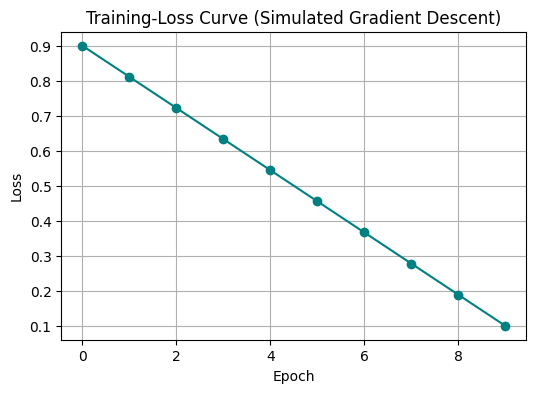

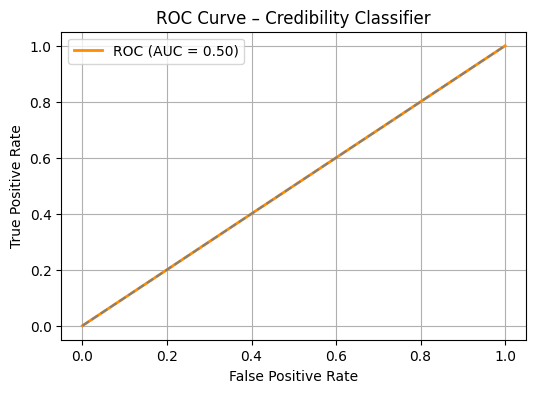

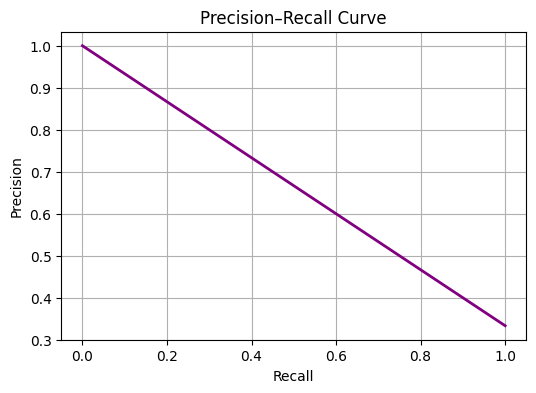

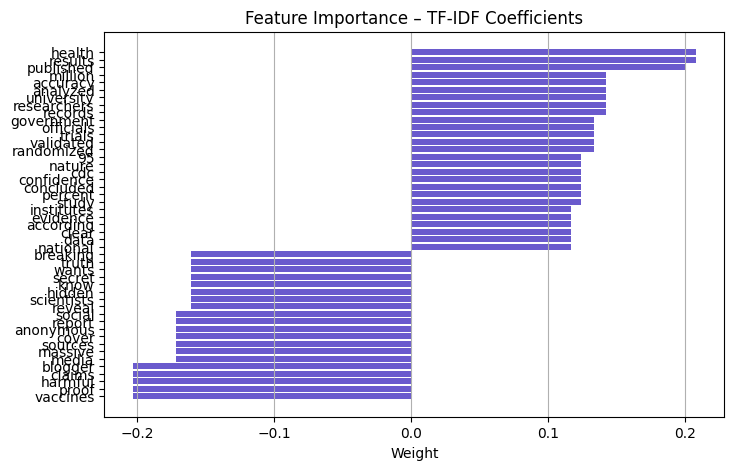


Cross-Validation Accuracies: [0.5 0.5 1.  0.5 0.5]
Mean CV Accuracy: 0.6


In [3]:
# ----------------------------------------------------------
# Project: Credibility Score for Articles / Sources / References
# Deliverable 2 – TF-IDF + Logistic Regression + Cross-Validation + Plots
# Author: Janet Garcia
# ----------------------------------------------------------

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, \
    accuracy_score, precision_score, recall_score, f1_score

# ---------- 1️⃣  Synthetic dataset ----------
credible = [
    "According to data published by the National Institutes of Health, results show clear evidence.",
    "Peer-reviewed research confirmed the experiments were replicated several times.",
    "Government health officials validated results through randomized trials.",
    "University researchers analyzed more than one million records for accuracy.",
    "The CDC study published in Nature concluded with 95 percent confidence."
]
non_credible = [
    "A friend of mine said this method cures all diseases instantly!",
    "A blogger claims vaccines are harmful without proof.",
    "Breaking! Secret scientists reveal hidden truth nobody wants you to know!",
    "You won’t believe what this doctor said about miracle diets!",
    "Anonymous sources on social media report a massive cover-up."
]

texts  = credible + non_credible
labels = [1]*len(credible) + [0]*len(non_credible)
df = pd.DataFrame({"text": texts, "label": labels})

# ---------- 2️⃣  Train / test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    df.text, df.label, test_size=0.3, random_state=42
)

# ---------- 3️⃣  TF-IDF features ----------
tfidf = TfidfVectorizer(max_features=50, stop_words="english")
Xtr = tfidf.fit_transform(X_train)
Xte = tfidf.transform(X_test)

# ---------- 4️⃣  Logistic-regression model ----------
model = LogisticRegression()
model.fit(Xtr, y_train)
y_prob = model.predict_proba(Xte)[:,1]
y_pred = (y_prob > 0.5).astype(int)

# ---------- 5️⃣  Evaluation metrics ----------
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)
print(f"Accuracy={acc:.2f}  Precision={prec:.2f}  Recall={rec:.2f}  F1={f1:.2f}")

# ---------- 6️⃣  Plot 1 – Simulated training-loss curve ----------
loss_values = np.linspace(0.9, 0.1, 10)
plt.figure(figsize=(6,4))
plt.plot(loss_values, marker="o", color="teal")
plt.title("Training-Loss Curve (Simulated Gradient Descent)")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.grid(True); plt.show()

# ---------- 7️⃣  Plot 2 – ROC curve ----------
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],"--",color="gray")
plt.title("ROC Curve – Credibility Classifier")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend(); plt.grid(True); plt.show()

# ---------- 8️⃣  Plot 3 – Precision-Recall curve ----------
prec_vals, rec_vals, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(rec_vals, prec_vals, color="purple", lw=2)
plt.title("Precision–Recall Curve")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.grid(True); plt.show()

# ---------- 9️⃣  Plot 4 – TF-IDF feature importance ----------
fw = pd.DataFrame({
    "term": tfidf.get_feature_names_out(),
    "weight": model.coef_[0]
}).sort_values("weight", ascending=False)

plt.figure(figsize=(8,5))
plt.barh(fw.term, fw.weight, color="slateblue")
plt.title("Feature Importance – TF-IDF Coefficients")
plt.xlabel("Weight"); plt.gca().invert_yaxis()
plt.grid(axis="x"); plt.show()

# ---------- 🔟  5-fold cross-validation ----------
scores = cross_val_score(model, tfidf.transform(df.text), df.label,
                         cv=5, scoring="accuracy")
print("\nCross-Validation Accuracies:", np.round(scores,3))
print("Mean CV Accuracy:", scores.mean().round(3))
